In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [3]:
dfPath = "data/2023_nba_player_stats.csv"

In [4]:
class DataProcessor:
    def __init__(self):
        self.DataFrame = None

    def load_data(self):
        return pd.read_csv(dfPath)

    def clean_data(self, data):
        return data.dropna()
    
DataP = DataProcessor()
df = DataP.load_data()
CleanedDataFrame = DataP.clean_data(df)

In [5]:
CleanedDataFrame

,Player,POS,Team,Age,GP,W,L,Min,PTS,OREB,DREB,REB,AST,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,78,571,649,342,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,113,557,670,274,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,54,515,569,529,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,59,270,329,371,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,137,605,742,359,6,341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,Jordan Schakel,F,WAS,24,2,0,2,6.2,3,0,0,0,1,0,6
530,Trevor Keels,G,NYK,19,3,3,0,8.0,3,0,2,2,0,0,-18
531,Chima Moneke,F,SAC,27,2,1,1,7.9,2,2,0,2,1,0,-9
532,Chris Silva,F,DAL,26,1,1,0,3.0,2,0,0,0,0,0,1


In [6]:
class DataAnalyzer:
    def __init__(self, CleanedDataFrame):
        self.CleanedDataFrame = CleanedDataFrame

    def get_average_of_column(self, column): 
        if is_numeric_dtype(CleanedDataFrame[column]) == True:
            return self.CleanedDataFrame[column].mean()
        else:
            print("Please try again with a numeric column")

    def get_distribution_of_column(self, column):
            if is_numeric_dtype(CleanedDataFrame[column]) == True:
                return self.CleanedDataFrame[column].std()
            else:
                print("Please try again with a numeric column")

    def get_median_of_column(self, column):
        if is_numeric_dtype(CleanedDataFrame[column]) == True:
            return self.CleanedDataFrame[column].median()
        else:
            print("Please try again with a numeric column")
            
    def get_mode_of_column(self, column):
        if is_numeric_dtype(CleanedDataFrame[column]) == True:
            return self.CleanedDataFrame[column].mode()
        else:
            print("Please try again with a numeric column")

DataA = DataAnalyzer(CleanedDataFrame)

In [7]:
DataA.get_average_of_column('PTS')

528.3277153558053

In [8]:
DataA.get_distribution_of_column('PTS')

497.8163492110944

In [9]:
DataA.get_median_of_column('L')

25.5

In [10]:
DataA.get_mode_of_column('PTS')

0    9
Name: PTS, dtype: int64

In [21]:
class DataVisualizer:
    def __init__(self, CleanedDataFrame):
        self.CleanedDataFrame = CleanedDataFrame

    def plot_line_chart(self,X, column, title, Color=None):
        sns.lineplot(x=X, y=column, data=self.CleanedDataFrame, color=Color)
        h= int(input("Enter 1 if you want to save this figure or Enter 0 if you don't want to save it: "))
        while h>1 or h<0:
            h= int(input("Please enter 0 or 1: "))
        if(h==1):
            plt.title(title)
            plt.savefig("Plots/"+title+".png")  # should before plt.show method
            plt.show()

    def plot_distribution(self, column, title, color=None):
        sns.histplot(x=column, data=self.CleanedDataFrame, color=color, kde=True)
        h= int(input("Enter 1 if you want to save this figure or Enter 0 if you don't want to save it: "))
        while h>1 or h<0:
            h= int(input("Please enter 0 or 1: "))
        if(h==1):
            plt.title(title)  
            plt.savefig("Plots/"+title+".png")  # should before plt.show method
            plt.show()

    def plot_pie(self, column, title):
        myLabels = self.CleanedDataFrame[column].unique()
        values = [self.CleanedDataFrame[column].value_counts()[x] for x in myLabels]
        plt.pie(x=values, data=self.CleanedDataFrame, labels = myLabels)
        h= int(input("Enter 1 if you want to save this figure or Enter 0 if you don't want to save it: "))
        while h>1 or h<0:
            h= int(input("Please enter 0 or 1: ")) 
        if(h==1):
            plt.title(title)  
            plt.savefig("Plots/"+title+".png")  # should before plt.show method
            plt.show()
        
    def plot_scatter(self, column_x, column_y, title, hue=None, palette=None):
        sns.scatterplot(x=column_x, y=column_y, data=self.CleanedDataFrame, hue=hue, palette=palette)
        h= int(input("Enter 1 if you want to save this figure or Enter 0 if you don't want to save it: "))
        while h>1 or h<0:
            h= int(input("Please enter 0 or 1: "))
        if(h==1):
            plt.title(title)  
            plt.savefig("Plots/"+title+".png")  # should before plt.show method
            plt.show()
        
DataV = DataVisualizer(CleanedDataFrame)

Enter 1 if you want to save this figure or Enter 0 if you don't want to save it: 0


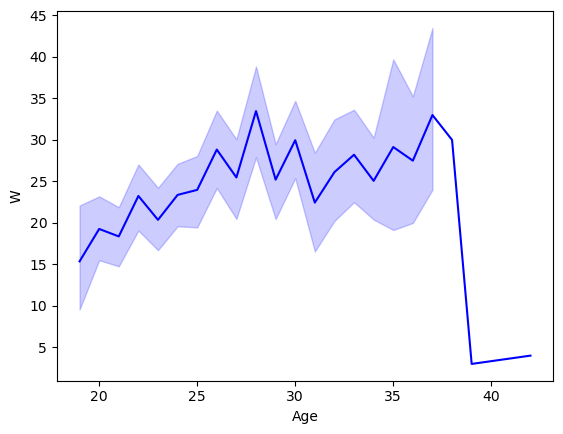

In [12]:
DataV.plot_line_chart("Age","W","Games_PTS_Lines", "blue")

Enter 1 if you want to save this figure or Enter 0 if you don't want to save it: 8
Please enter 0 or 1: 0


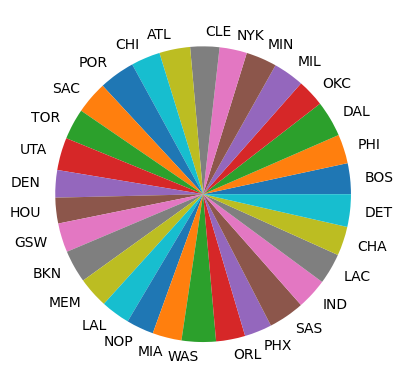

In [12]:
DataV.plot_pie('Team','lll')

Enter 1 if you want to save this figure or Enter 0 if you don't want to save it: 0


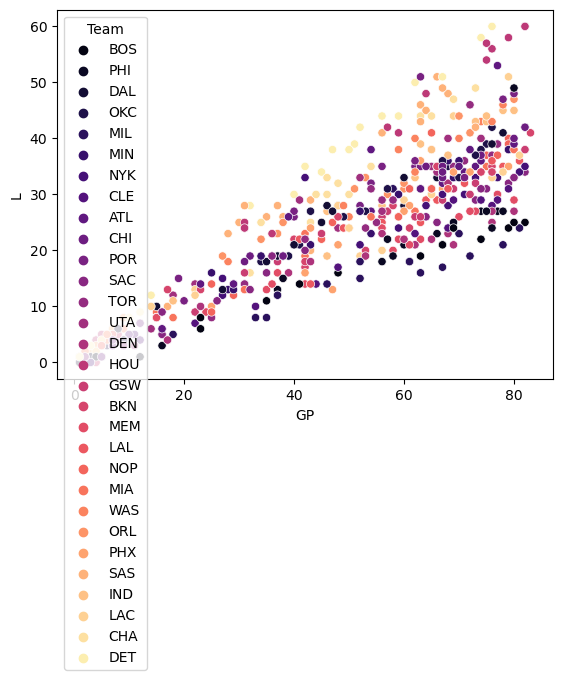

In [13]:
DataV.plot_scatter('GP', 'L', "GamsL", hue="Team", palette="magma")

Enter 1 if you want to save this figure or Enter 0 if you don't want to save it: 1


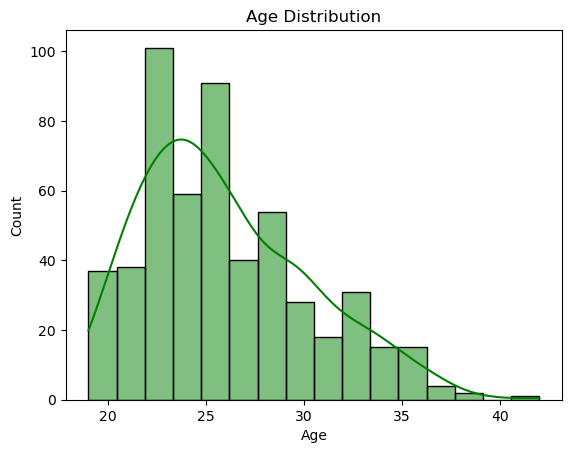

In [24]:
DataV.plot_distribution("Age","Age Distribution", color="green")